In [18]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn import metrics

class Dbscan:

  def __init__(self):
    self.df = pd.read_csv('Country-data.csv')
    self.df = self.df.loc[:,('exports','imports')]

  def standardization(self):
    self.scalar = StandardScaler()
    self.scaled = self.scalar.fit_transform(self.df)
  
  def dbscan(self):
    self.db = DBSCAN(eps=0.25, min_samples=5).fit(self.scaled)
    core_samples_mask = np.zeros_like(self.db.labels_, dtype=bool)
    core_samples_mask[self.db.core_sample_indices_] = True
    labels = self.db.labels_
    no_clusters = len(np.unique(labels) )
    no_noise = np.sum(np.array(labels) == -1, axis=0)
    print('Estimated no. of clusters: %d' % no_clusters)
    print('Estimated no. of noise points: %d' % no_noise) 

  def showplot(self):

    colors = ["cyan", "red", "yellow", "green", "blue", "purple", "pink"]
    df_values = self.df.values.tolist()
    plt.figure(figsize=(15, 10))
    for p, c in zip(df_values, self.db.labels_):
        if c == -1:
            color = "gray"
        else:
            color = colors[c]
        plt.scatter(p[0], p[1], color=color)
    plt.ylabel("imports")
    plt.xlabel("exports")
    plt.show()


In [16]:
obj = Dbscan()
obj.standardization()
obj.dbscan()


Estimated no. of clusters: 4
Estimated no. of noise points: 36


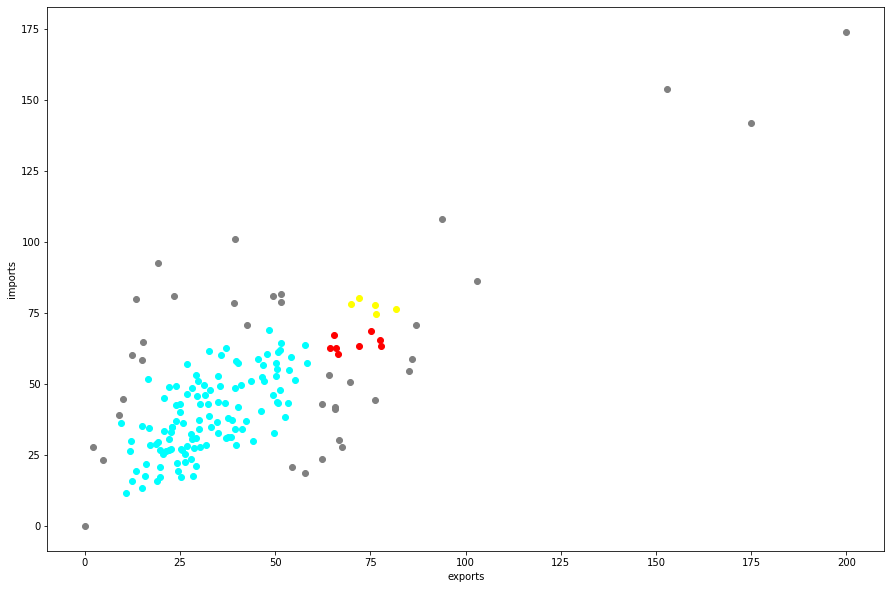

In [17]:
obj.showplot()